In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载和加载MNIST数据集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 下载和加载MNIST数据集
test_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# 创建数据加载器
test_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 91888756.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 80918967.15it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32651546.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13636742.14it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 定义简单的卷积神经网络模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [1/10], Loss: 0.1665, Accuracy: 95.06%
Epoch [2/10], Loss: 0.0469, Accuracy: 98.52%
Epoch [3/10], Loss: 0.0327, Accuracy: 98.98%
Epoch [4/10], Loss: 0.0242, Accuracy: 99.23%
Epoch [5/10], Loss: 0.0179, Accuracy: 99.43%
Epoch [6/10], Loss: 0.0147, Accuracy: 99.53%
Epoch [7/10], Loss: 0.0115, Accuracy: 99.64%
Epoch [8/10], Loss: 0.0095, Accuracy: 99.68%
Epoch [9/10], Loss: 0.0081, Accuracy: 99.74%
Epoch [10/10], Loss: 0.0081, Accuracy: 99.72%


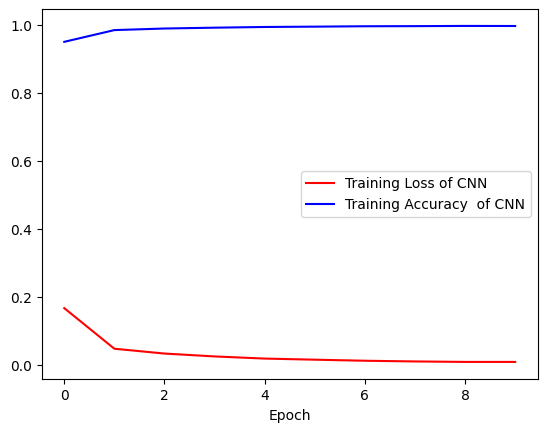

In [ ]:
# 记录训练损失和准确度的列表
train_losses = []
train_accuracies = []

# 训练模型
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 统计训练损失
        running_loss += loss.item()

        # 统计训练准确度
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # 计算平均训练损失
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)

    # 计算训练准确度
    accuracy = correct_predictions / total_samples
    train_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

# 绘制学习曲线，使用明显的颜色
plt.plot(train_losses, label='Training Loss of CNN', color='r')
plt.plot(train_accuracies, label='Training Accuracy  of CNN', color='b')

# 添加图例
plt.legend()

# 显示图形
plt.xlabel('Epoch')
plt.show()


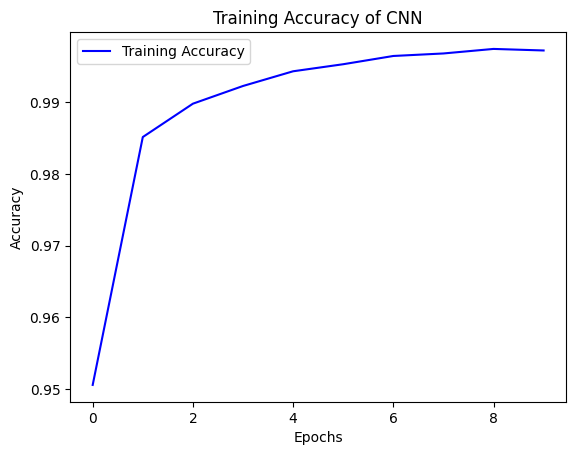

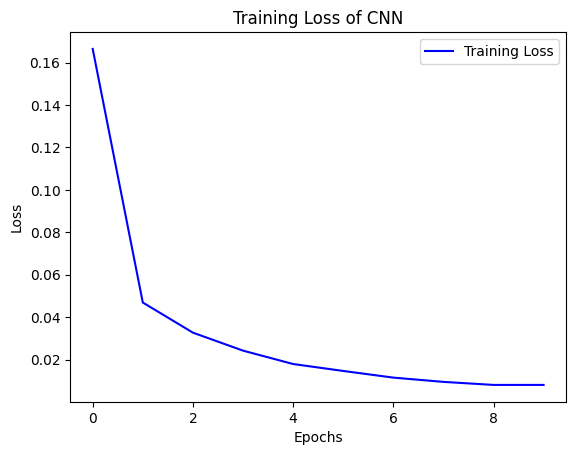

In [ ]:
# 绘制训练和验证的准确率曲线
plt.plot(train_accuracies, label='Training Accuracy', color='b')
#plt.plot(val_accuracies, label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy of CNN')
plt.show()

# 绘制训练和验证的损失值曲线
plt.plot(train_losses, label='Training Loss', color='b')
#plt.plot(val_losses, label='Validation Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss of CNN')
plt.show()

In [ ]:
from torchsummary import summary

# 打印模型结构和参数数量
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 在测试集上进行预测
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

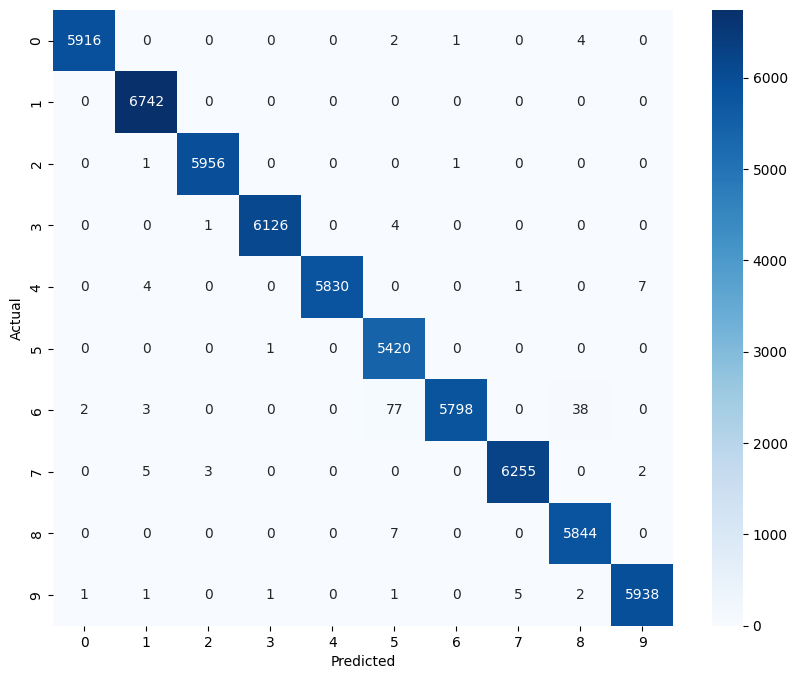

In [ ]:
# 生成混淆矩阵
cm = confusion_matrix(all_labels, all_preds)

# 使用seaborn绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import itertools
import numpy as np

# 绘制混淆矩阵
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - cm : 计算出的混淆矩阵的值
    - classes : 混淆矩阵中每一行每一列对应的列
    - normalize : True:显示百分比, False:显示个数
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
attack_types = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Normalized confusion matrix
[[9.98818166e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.37666723e-04 1.68833361e-04 0.00000000e+00
  6.75333446e-04 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.67841558e-04 9.99664317e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.67841558e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.63105529e-04 9.99184472e-01
  0.00000000e+00 6.52422117e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.84697022e-04 0.00000000e+00 0.00000000e+00
  9.97945909e-01 0.00000000e+00 0.00000000e+00 1.71174255e-04
  0.00000000e+00 1.19821979e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.84467810e-04
  0.00000000e+00 9.99815532e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.37952011e-04 5.06928016e-0

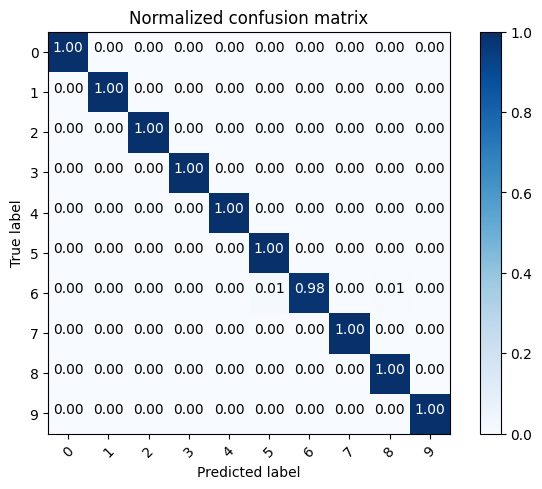

In [ ]:
plot_confusion_matrix(cm, classes=attack_types, normalize=True, title='Normalized confusion matrix')

In [ ]:
from sklearn.metrics import f1_score

# 假设 all_preds 是预测标签，all_labels 是真实标签
# 计算 Macro-averaging 的 F1-score
macro_f1 = f1_score(all_labels, all_preds, average='macro')
print(f'Macro-averaging F1-score: {macro_f1:.4f}')

# 计算 Micro-averaging 的 F1-score
micro_f1 = f1_score(all_labels, all_preds, average='micro')
print(f'Micro-averaging F1-score: {micro_f1:.4f}')

# 计算每个类别的 F1-score
per_class_f1 = f1_score(all_labels, all_preds, average=None)
print('Per-class F1-score:')
for i, f1 in enumerate(per_class_f1):
    print(f'Class {i}: {f1:.4f}')


Macro-averaging F1-score: 0.9970
Micro-averaging F1-score: 0.9971
Per-class F1-score:
Class 0: 0.9992
Class 1: 0.9990
Class 2: 0.9995
Class 3: 0.9994
Class 4: 0.9990
Class 5: 0.9916
Class 6: 0.9896
Class 7: 0.9987
Class 8: 0.9957
Class 9: 0.9983


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9971


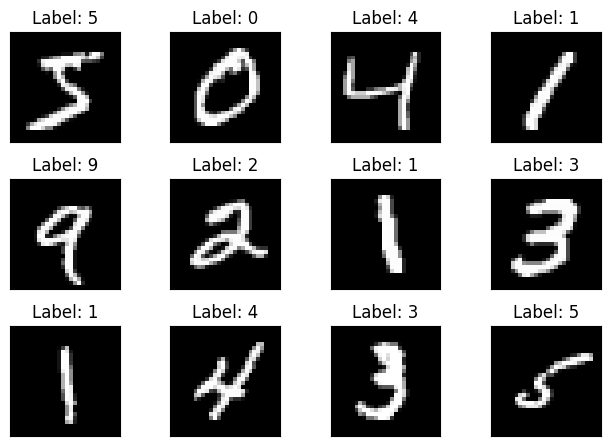

In [ ]:
from matplotlib import pyplot as plt
from torchvision import datasets, transforms
import numpy as np

# 准备数据集
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# 查看图像
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.tight_layout()
    # 将torch.Tensor转换为numpy.ndarray
    plt.imshow(train_dataset.data[i].numpy(), cmap='gray', interpolation='none')
    plt.title("Label: {}".format(train_dataset.targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# 在测试集上进行预测
# 请确保已经获取了all_preds和all_labels

# 生成分类报告
report = classification_report(all_labels, all_preds)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       0.98      1.00      0.99      5421
           6       1.00      0.98      0.99      5918
           7       1.00      1.00      1.00      6265
           8       0.99      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
from sklearn.metrics import precision_score, recall_score

# 计算每个类别的精确率和召回率
precision = precision_score(all_labels, all_preds, average=None)
recall = recall_score(all_labels, all_preds, average=None)

# 打印每个类别的精确率和召回率
for class_label in range(10):  # num_classes 是类别的数量
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}")


Class 0 - Precision: 0.9994931576279777, Recall: 0.9988181664696945
Class 1 - Precision: 0.9979277679100059, Recall: 1.0
Class 2 - Precision: 0.9993288590604027, Recall: 0.9996643168848607
Class 3 - Precision: 0.9996736292428199, Recall: 0.9991844723536127
Class 4 - Precision: 1.0, Recall: 0.9979459089352961
Class 5 - Precision: 0.9834875703139176, Recall: 0.9998155321896329
Class 6 - Precision: 0.9996551724137931, Recall: 0.9797228793511321
Class 7 - Precision: 0.9990416866315285, Recall: 0.9984038308060654
Class 8 - Precision: 0.9925271739130435, Recall: 0.9988036233122544
Class 9 - Precision: 0.9984866319152513, Recall: 0.998150949739452
